# Softmax Regression/Multinominal Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
36,5.5,3.5,1.3,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
133,6.3,2.8,5.1,1.5,virginica
114,5.8,2.8,5.1,2.4,virginica
22,4.6,3.6,1.0,0.2,setosa
57,4.9,2.4,3.3,1.0,versicolor
136,6.3,3.4,5.6,2.4,virginica


In [4]:
le = LabelEncoder()

In [5]:
df['species'] = le.fit_transform(df['species'])

In [6]:
df = df[['sepal_length','petal_length','species']]

In [7]:
df.sample(10)

,sepal_length,petal_length,species
86,6.7,4.7,1
105,7.6,6.6,2
61,5.9,4.2,1
83,6.0,5.1,1
30,4.8,1.6,0
101,5.8,5.1,2
23,5.1,1.7,0
103,6.3,5.6,2
98,5.1,3.0,1
59,5.2,3.9,1


In [8]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:2],df.iloc[:,-1],
                                                test_size=0.2,random_state=2)

In [9]:
lg = LogisticRegression(multi_class='multinomial') #softmax

In [10]:
lg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [11]:
y_pred = lg.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [13]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [14]:
from mlxtend.plotting import plot_decision_regions

C:\Users\shaki\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


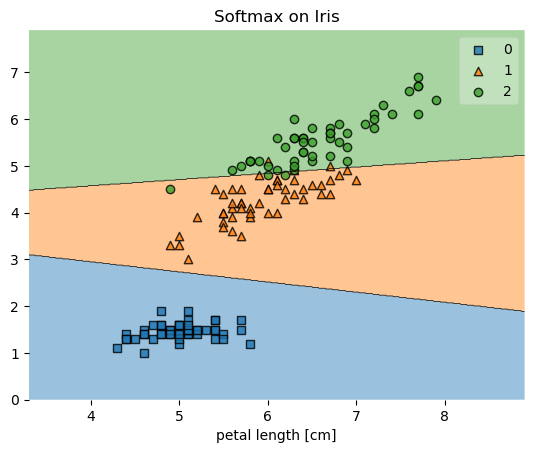

In [15]:
plot_decision_regions(df.iloc[:,0:2].values,df.iloc[:,-1].values, lg, legend=1)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()